#**Multiple Linear Regression**

In this notebook, we will focus on Multiple Linear Regression using numpy and pandas.

General equation of Multiple Linear Regression:

**Y = β0 + β1X1 + β2X2 + … + βpXp + ε**

**Y:** The response variable

**Xj:** The jth predictor variable

**βj:** The average effect on Y of a one unit increase in Xj, holding all other predictors fixed

**ε:** The error term


In [2]:
import pandas as pd
import numpy as np

# **Load The Data**

In [3]:

data = pd.read_csv("/content/Real-estate1.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.5947,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.9845,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.9845,5,24.98746,121.54391,54.8
4,5,2012.833,5,390.5684,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.015,0,24.94155,121.50381,15.4
410,411,2012.917,2,1455.798,1,24.9512,121.549,25.6
411,412,2013.250,18.8,390.9696,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.8101,5,24.96674,121.54067,52.5


# **Data Preprocessing**

In [4]:
# data['X3 distance to the nearest MRT station'] = pd.to_numeric(
#     data['X3 distance to the nearest MRT station'], errors='coerce'
# )
# data['X5 latitude'] = pd.to_numeric(data['X5 latitude'], errors='coerce')
# data['X6 longitude'] = pd.to_numeric(data['X6 longitude'], errors='coerce')

data['X2 house age'] = pd.to_numeric(data['X2 house age'], errors='coerce')
data['X3 distance to the nearest MRT station'] = pd.to_numeric(data['X3 distance to the nearest MRT station'], errors='coerce')
data['X5 latitude'] = pd.to_numeric(data['X5 latitude'], errors='coerce')
data['X6 longitude'] = pd.to_numeric(data['X6 longitude'], errors='coerce')
data['Y house price of unit area'] = pd.to_numeric(data['Y house price of unit area'], errors='coerce')


# **Handling Missing Values:**

In [5]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     412 non-null    float64
 2   X2 house age                            411 non-null    float64
 3   X3 distance to the nearest MRT station  408 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             412 non-null    float64
 6   X6 longitude                            412 non-null    float64
 7   Y house price of unit area              412 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:

def handle_missing_values(data):
  data = data.dropna(subset=['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'], axis=0)
  # data['y'] = data['y'].fillna(np.mean(data['y']))

  return data


# **Test case**
x: [24.98298, 24.9796, nan, 324.9795, nan, 24.98034, 24.98746, 24.96515,24.97744,nan]

y: [37.9, 38.1, nan, 36.5864, nan, 42,2, 47.3, 39.3, 71.3, nan]


In [7]:
cleaned_data_missing = handle_missing_values(data)

cleaned_data_missing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      397 non-null    int64  
 1   X1 transaction date                     397 non-null    float64
 2   X2 house age                            397 non-null    float64
 3   X3 distance to the nearest MRT station  397 non-null    float64
 4   X4 number of convenience stores         397 non-null    int64  
 5   X5 latitude                             397 non-null    float64
 6   X6 longitude                            397 non-null    float64
 7   Y house price of unit area              397 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 27.9 KB


# **Removing Duplicates:**

In [8]:
data.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [9]:
def remove_duplicates(df):
  df.drop_duplicates(subset=['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'], keep="first", inplace=True, ignore_index=True)

  return df


# **Test Case**
x: [32, 32, 19.5, 13.5, 6.3,10.5, 14.7, 29.3, 29.3]

y: [37.9, 37.9, 42.2, 47.3, 58.1, 51.6,  24.6, 27, 27]

In [10]:
cleaned_data_duplicates = remove_duplicates(cleaned_data_missing)


cleaned_data_duplicates = remove_duplicates(cleaned_data_missing)
cleaned_data_duplicates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      397 non-null    int64  
 1   X1 transaction date                     397 non-null    float64
 2   X2 house age                            397 non-null    float64
 3   X3 distance to the nearest MRT station  397 non-null    float64
 4   X4 number of convenience stores         397 non-null    int64  
 5   X5 latitude                             397 non-null    float64
 6   X6 longitude                            397 non-null    float64
 7   Y house price of unit area              397 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 24.9 KB


<ipython-input-9-2718b6271001>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(subset=['No', 'X1 transaction date', 'X2 house age',


# **Handle Outliers**

In [11]:
def handle_outliers(df, column):
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)

  IQR = q3 - q1

  u_limit = q3 + (1.5*IQR)
  l_limit = q1 - (1.5*IQR)

  df = df[df[column] < u_limit]
  df = df[df[column] > l_limit]

  return df

# **Test Case**
x: [32, 89.5, 19.5, 13.5, 6.3,10.5, 14.7, 29.3, 70.5]

y: [37.9, 110.7, 42.2, 47.3, 58.1, 51.6,  24.6, 27,99.4]



In [13]:
# cleaned_data_outliers = handle_outliers(cleaned_data_duplicates, 'y')

# cleaned_data_outliers = handle_outliers(cleaned_data_duplicates, 'x')

# cleaned_data_outliers.info()

# **Normalizing Data**
In Machine Learning, we often need to deal with normalization. Normalization is the process of scaling the data to the range of 0 to 1. In this exercise, we will use `MinMaxScaler()`.

The calculation of `MinMaxScaler()` is as below:
$$X_{sc} = \frac{X - X_{min}}{X_{max} - X_{min}}$$



In [14]:
def standardize_data(df, columns):
    df[columns] = (df[columns] - np.mean(df[columns], axis=0)) / np.std(df[columns], axis=0)
    return df

# **Test Case**
x: [32, 12.7, 19.5, 13.5, 6.3,10.5, 14.7, 29.3, 8.1]

y: [37.9, 32.3, 42.2, 47.3, 58.1, 51.6,  24.6, 27, 52.5]

In [15]:
cleaned_data_standardized = standardize_data(cleaned_data_duplicates, ['X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'])



<ipython-input-14-04bad758163b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columns] = (df[columns] - np.mean(df[columns], axis=0)) / np.std(df[columns], axis=0)


# **Find Correlation between Target Varible and Feature**     

                                        X3 distance to the nearest MRT station  \
X3 distance to the nearest MRT station                                1.000000   
X4 number of convenience stores                                      -0.602523   
X5 latitude                                                          -0.591457   
X6 longitude                                                         -0.807540   

                                        X4 number of convenience stores  \
X3 distance to the nearest MRT station                        -0.602523   
X4 number of convenience stores                                1.000000   
X5 latitude                                                    0.446998   
X6 longitude                                                   0.444674   

                                        X5 latitude  X6 longitude  
X3 distance to the nearest MRT station    -0.591457     -0.807540  
X4 number of convenience stores            0.446998      0.444674  
X5 latitu

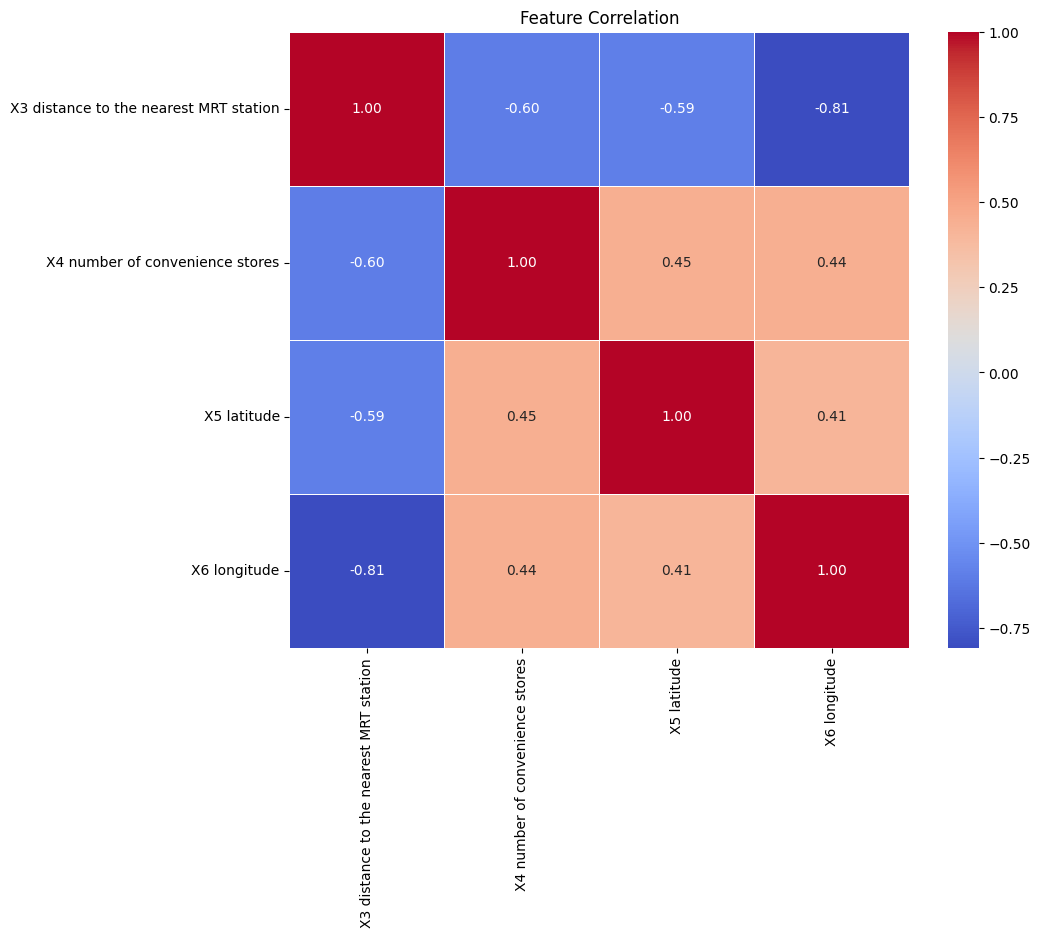

In [16]:

import seaborn as sns
import matplotlib.pyplot as plt

def show_stats(df):
  corr_matrix = df.corr()
  print(corr_matrix)
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)

  plt.title("Feature Correlation")
  plt.show()

show_stats(data[['X3 distance to the nearest MRT station','X4 number of convenience stores', 'X5 latitude', 'X6 longitude']])


In [21]:
def initialize(X):
  thetas = np.zeros(X.shape[1]+1)
  return thetas

def hypothesis(X, thetas):
  if X.ndim==1:
    X = X.reshape(-1, 1)

  X = np.hstack((X, np.ones((X.shape[0], 1))))
  return np.dot(X, thetas)

def MSE(X, Y, thetas):
  Y_pred = hypothesis(X, thetas)
  Loss = (np.sum((Y - Y_pred)**2)) / len(Y)
  return Loss

def derivative(X, Y, thetas):
  Y_pred = hypothesis(X, thetas)
  error = Y - Y_pred

  X = np.hstack((X, np.ones((X.shape[0], 1))))

  der = (-2/len(X)) * np.dot(error, X)

  return der

def gradient_descent(X, Y, thetas, epochs, lr):

    for i in range(epochs):
        grads = derivative(X, Y, thetas)
        thetas = thetas - (grads * lr)

        if i%100 == 0:
            loss =  MSE(X, Y, thetas)
            print(loss)

    return thetas


In [22]:
X   = np.array(cleaned_data_standardized[['X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']])
y = np.array(cleaned_data_standardized.iloc[:, -1])

X_train, Y_train = X[:331],y[:331]
X_test, Y_test = X[331:], y[331:]


In [23]:
# weights, bias = train_model(X_train, Y_train, learning_rate=0.001, iterations=1000)

# print("Trained weights:", weights)
# print("Trained bias:", bias)


def train_model(X, Y, epochs, lr):

    if X.ndim == 1:
      X= X.reshape(-1, 1)


    thetas = initialize(X)

    thetas = gradient_descent(X, Y, thetas, epochs, lr)

    print('thetas: ', thetas)

    return thetas

thetas = train_model(X_train, Y_train, 1000, 0.001)


1.011676006796304
0.6713232970172995
0.5488364436451965
0.5026940269902164
0.48389747090734764
0.47529777494649017
0.4707690913212664
0.4680403658762453
0.4662150139178247
0.4649040623829084
thetas:  [ 0.08958668 -0.14272621 -0.26153728  0.25030755  0.23251714  0.12585177
 -0.00412678]


# **Plot the Predictive line**

In [ ]:
def predict(X, w, b):
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    y_pred = np.dot(X, w) + b

    return y_pred

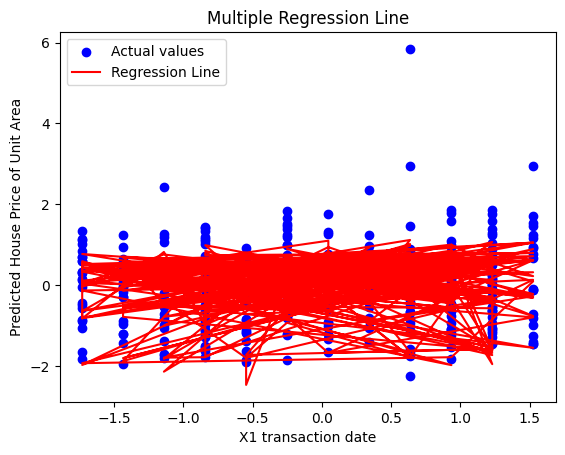

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_train_with_bias = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
predictions = np.dot(X_train_with_bias, np.append(weights, bias))

plt.scatter(X_train[:, 0], Y_train, color='blue', label='Actual values')
plt.plot(X_train[:, 0], predictions, color='red', label='Regression Line')

plt.xlabel('X1 transaction date')  # Change to the feature you want to plot
plt.ylabel('Predicted House Price of Unit Area')
plt.title('Multiple Regression Line')
plt.legend()
plt.show()


# **Implement Multiple Linear Regression Model using Scikit Learn**

Trained weights: [ 1.17823571 -2.01122268 -5.84579434  3.37245896  2.80132399 -0.22681445]
Trained bias: 38.04416403785345


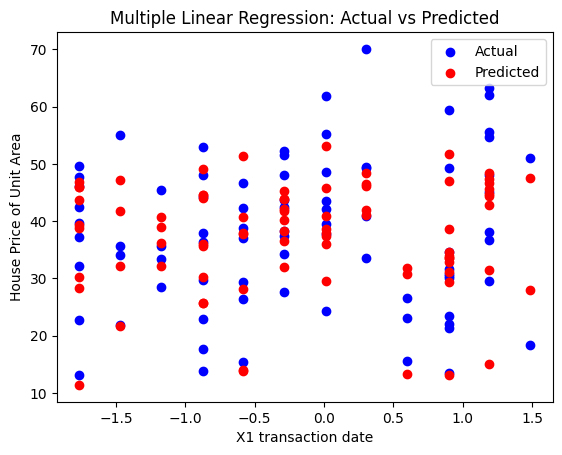

Mean Squared Error: 60.97637965746465
R-squared: 0.6309164822754179


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

data = data.dropna(axis=0)  # Remove rows with missing values

X = data[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
          'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']].values

y = data['Y house price of unit area'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred = model.predict(X_test)

print("Trained weights:", model.coef_)
print("Trained bias:", model.intercept_)

weights, bias = model.coef_, model.intercept_

plt.scatter(X_test[:, 0], Y_test, color='blue', label='Actual')  # Actual data
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')  # Predicted data

plt.xlabel('X1 transaction date')
plt.ylabel('House Price of Unit Area')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


# **Plot the Best Fit Line**

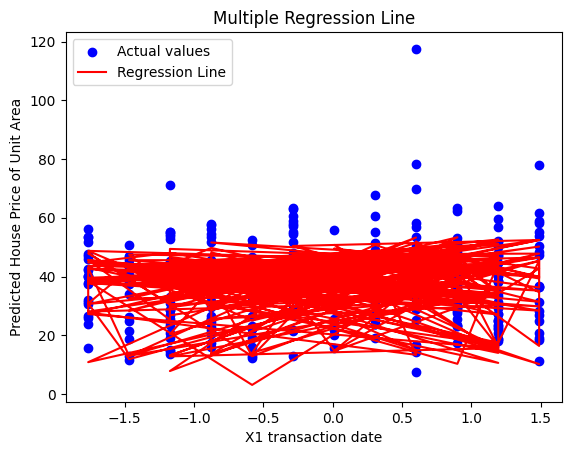

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_train_with_bias = np.hstack((X_train, np.ones((X_train.shape[0], 1))))
predictions = np.dot(X_train_with_bias, np.append(weights, bias))

plt.scatter(X_train[:, 0], Y_train, color='blue', label='Actual values')
plt.plot(X_train[:, 0], predictions, color='red', label='Regression Line')

plt.xlabel('X1 transaction date')  # Change to the feature you want to plot
plt.ylabel('Predicted House Price of Unit Area')
plt.title('Multiple Regression Line')
plt.legend()
plt.show()
